<a href="https://colab.research.google.com/github/TXH2020/MainRepo/blob/main/Online%20Courses/Data%20Analytics%20With%20Python/Program11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Logistic Regression Model
###In the linear regression model, the dependent variable was not not categorical.This is because such a model cannot handle categorical variables. Let us understand this with reference to an example:
*Taken From Statistics For Business And Engineering:Anderson,Sweeny*
###Let us consider an application of logistic regression involving a direct mail promotion being used by Simmons Stores. Simmons owns and operates a national chain of women’s apparel stores. Five thousand copies of an expensive four-color sales catalog have been printed,and each catalog includes a coupon that provides a $$50 discount on purchases of $200 or more.
###The catalogs are expensive and Simmons would like to send them to only those customers who have the highest probability of using the coupon.Management thinks that annual spending at Simmons Stores and whether a customer has a Simmons credit card are two variables that might be helpful in predicting whether a customer who receives the catalog will use the coupon. Simmons conducted a pilot study using a random sample of 50 Simmons credit card customers and 50 other customers who do not have a Simmons credit card. Simmons sent the catalog to each of the 100 customers selected. At the end of a test period, Simmons noted whether the customer used the coupon. The sample data for the first 10 catalog recipients are shown in Table 15.11. The amount each customer spent last year at Simmons is shown in thousands of dollars and the credit card information has been coded as 1 if the customer has a Simmons credit card and 0 if not. In the Coupon column, a 1 is recorded if the sampled customer used the coupon and 0 if not.

Table 15.11
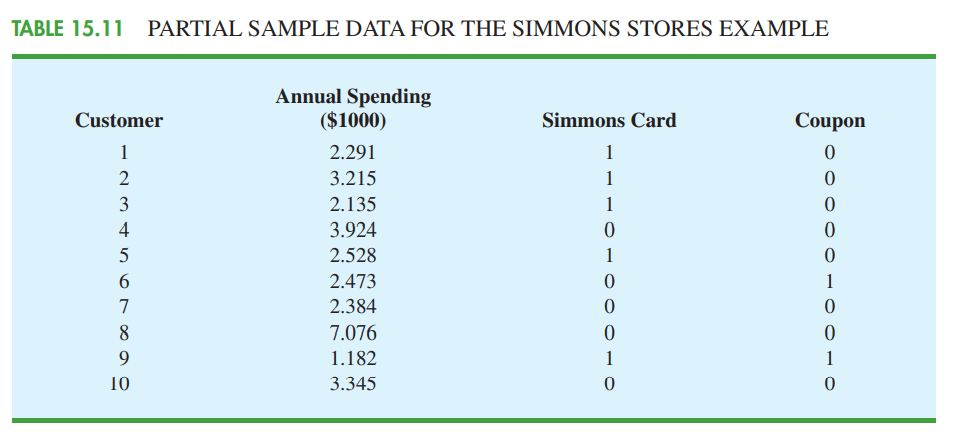



In [1]:
import pandas as pd                 #Reading data as dataframe
import statsmodels.api as sm
df=pd.read_csv("https://raw.githubusercontent.com/TXH2020/fast-labeling-workflow/master/Datasets/Data_Analytics_Python/simmons.csv")
df.head()

,Customer,Spending,Card,Purchase
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


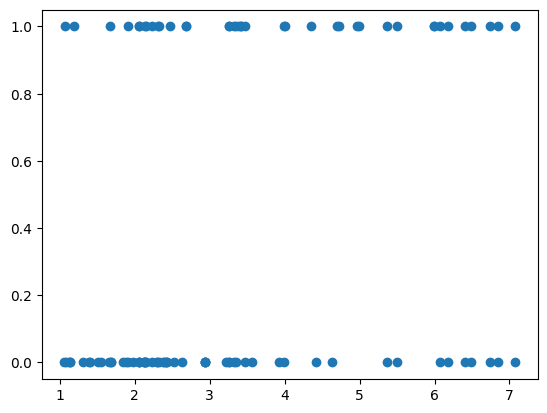

In [2]:
import matplotlib.pyplot as plt                 #Visualizing relationship between dependent and
                                                #independent variable
plt.scatter(df['Spending'],df['Purchase'])
plt.show()

###It is evident from the above figure that we cannot consturct a linear regression model. Thus we use a logistic regression model. The equation of the model is:
\begin{align}
E(y)=\frac{e^(\sum_{i=0}^p\beta_ix_i)}{1+e^(\sum_{i=0}^p\beta_ix_i)}
\end{align}

###This equation produces an S shaped curve. Here E(y) is the probability that y=1,given the values of the independent variables $x_1,x_2,x_3,.....x_p$
###Here y=1 says that the the customer will use the coupon.

In [3]:
x=df[['Card','Spending']]           #Preparing logistic regression model
y=df['Purchase']
x=sm.add_constant(x)
model=sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Purchase   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Fri, 22 Sep 2023   Pseudo R-squ.:                  0.1012
Time:                        11:22:37   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Card           1.0987      0.445      2.471      0.013       0.227       1.970
Spending       0.3416      0.129      2.655      0.008       0.089       0.594
==============================================================================
"""

In [4]:
print("Model parameters are\n",model.params,"\n")         #Essential information about Model
print("Log Likelihood:",model.llf)
print("Log Likelihood without variable:",model.llnull)

Model parameters are
 const      -2.146373
Card        1.098732
Spending    0.341643
dtype: float64 

Log Likelihood: -60.48694795718266
Log Likelihood without variable: -67.30116671007215


In [5]:
import numpy as np                    #G statistic for overall significance
G=-2*(model.llnull-model.llf)
print("G statistic=",G)
#Similarly we can also refer the Z test scores of each variable to check individual significance

G statistic= 13.62843750577899


In [6]:
import numpy as np                    #Predict probability when User has credit card and his
model.predict(np.array([1,1,2.0]))    #spending is 2K

array([0.40990584])

###To test the importance of each variable, we can make use of the Odds Ratio. It is the effect of a unit increase in one of the variables while the other variables remain constant.

In [7]:
#To find odds ratio corresponding to credit card usage. We can assume anything for the annual spending(say 2k)
odds0=model.predict(np.array([1,0,2.0]))/(1-model.predict(np.array([1,0,2.0])))
odds1=model.predict(np.array([1,1,2.0]))/(1-model.predict(np.array([1,1,2.0])))
odds_ratio_for_card=odds1/odds0
print("Odds ratio for credit card usage=",odds_ratio_for_card)

Odds ratio for credit card usage= [3.00035872]


###Thus we find that the odds of using coupon increases 3 times when the customer uses a credit card
###Actually, there is a relationship between odds ratio and the computed coeffiecients of regression.
###Odds Ratio=$e^(\beta_i)$


In [8]:
print("Odds_ratio=e^b:",int(odds_ratio_for_card)==int(np.exp(model.params[1])))

Odds_ratio=e^b: True


###Suppose for the annual spending variable; we want to measure the effect of 'c' units increase in spending
###We can easily do so using the relation
###$Odds Ratio_c=e^(\beta_1.c)$

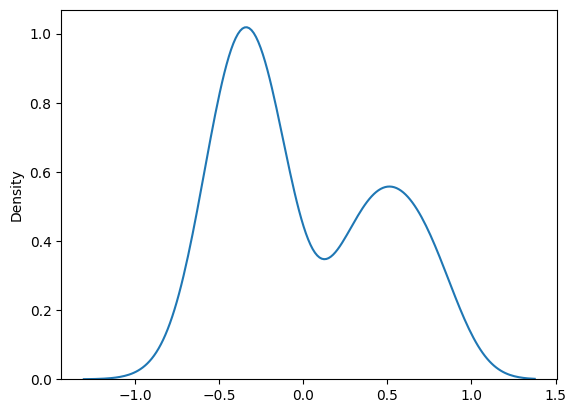

In [9]:
import seaborn as sns
res=model.resid_response        #Residuals follow binomial distribution
sns.kdeplot(res)
plt.show()

In [10]:
#To prepare model using sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x1=df[['Card','Spending']]
y1=df['Purchase'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.25)

Lreg=LogisticRegression(solver='lbfgs',multi_class='ovr')
model1=Lreg.fit(x_train,y_train.ravel())

y_predict=model1.predict(x_test)
print("predicted array\n",y_predict)
print("predicted probability\n",model1.predict_proba(x_test))
from sklearn.metrics import accuracy_score
print("Accuracy=",accuracy_score(y_test,y_predict))

predicted array
 [1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
predicted probability
 [[0.28272529 0.71727471]
 [0.30117871 0.69882129]
 [0.86683148 0.13316852]
 [0.66564974 0.33435026]
 [0.69523208 0.30476792]
 [0.7987902  0.2012098 ]
 [0.81872417 0.18127583]
 [0.57290309 0.42709691]
 [0.68161391 0.31838609]
 [0.82727862 0.17272138]
 [0.37316731 0.62683269]
 [0.41368519 0.58631481]
 [0.48682827 0.51317173]
 [0.50645708 0.49354292]
 [0.81931242 0.18068758]
 [0.86969118 0.13030882]
 [0.73054202 0.26945798]
 [0.63359987 0.36640013]
 [0.5662874  0.4337126 ]
 [0.76613694 0.23386306]
 [0.63359987 0.36640013]
 [0.68204438 0.31795562]
 [0.55808259 0.44191741]
 [0.68931427 0.31068573]
 [0.84094526 0.15905474]]
Accuracy= 0.52


In [11]:
#Confusion Matrix:A useful method to check model quality
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
print("Confusion Matrix is\n")
print("\t0\t1")
print("0\t",cm[0][0],"\t",cm[0][1])
print("1\t",cm[1][0],"\t",cm[1][1])

Confusion Matrix is

	0	1
0	 10 	 2
1	 10 	 3


In [12]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.83      0.62        12
           1       0.60      0.23      0.33        13

    accuracy                           0.52        25
   macro avg       0.55      0.53      0.48        25
weighted avg       0.55      0.52      0.47        25



In [13]:
#Receiver Operating Characteristics Curve(ROC Curve). Another useful measure
#to measure model quality
#ROC Curve for test data
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
y_pred_test=model1.predict(x_test)
logr=roc_auc_score(y_test,y_pred_test)
print("Log AUC Score:",logr)


Log AUC Score: 0.5320512820512822


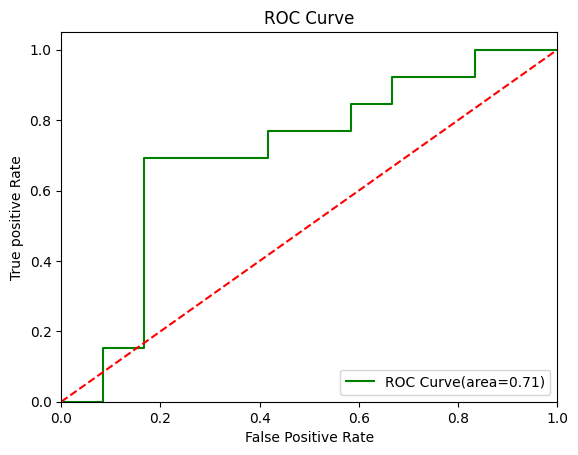

In [14]:
y_prob_test=model1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob_test)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,color='green',label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel("True positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')

In [15]:
#Checking Model Accuracy For different threshold value
from sklearn.preprocessing import binarize
y_pred1=binarize(y_prob_test.reshape(1,-1),threshold=0.35)[0]
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.82      0.69      0.75        13

    accuracy                           0.76        25
   macro avg       0.77      0.76      0.76        25
weighted avg       0.77      0.76      0.76        25



In [16]:
#Finding Optimal threshold value
i=np.arange(len(fpr))
roc=pd.DataFrame({'fpr':pd.Series(fpr,index=i),'tpr':pd.Series(tpr,index=i),
                  'tf':pd.Series(tpr-1+fpr,index=i),
                  "Thresholds":pd.Series(thresholds,index=i)})
opt=roc.iloc[roc.tf.abs().argsort()[0]]['Thresholds']
print("Optimal threshold value=",opt)

Optimal threshold value= 0.31795562335942307


In [17]:
#Checking Model Accuracy For optimal threshold value
y_pred2=binarize(y_prob_test.reshape(1,-1),threshold=opt)[0]
print(classification_report(y_test,y_pred2))
fpr1,tpr1,thresholds1=roc_curve(y_test,y_pred2)
roc_auc1=auc(fpr1,tpr1)
print("Area under AOC={0:0.2f}".format(roc_auc1))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.69      0.69      0.69        13

    accuracy                           0.68        25
   macro avg       0.68      0.68      0.68        25
weighted avg       0.68      0.68      0.68        25

Area under AOC=0.68
